In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('drugEffects.csv')
data

,Unnamed: 0,urlDrugName,rating,effectiveness,condition,sideEffects
0,0,enalapril,4,Highly Effective,management of congestive heart failure,Mild Side Effects
1,1,ortho-tri-cyclen,1,Highly Effective,birth prevention,Severe Side Effects
2,2,ponstel,10,Highly Effective,menstrual cramps,No Side Effects
3,3,prilosec,3,Marginally Effective,acid reflux,Mild Side Effects
4,4,lyrica,2,Marginally Effective,fibromyalgia,Severe Side Effects
...,...,...,...,...,...,...
3102,3102,vyvanse,10,Highly Effective,adhd,Mild Side Effects
3103,3103,zoloft,1,Ineffective,depression,Extremely Severe Side Effects
3104,3104,climara,2,Marginally Effective,total hysterctomy,Moderate Side Effects
3105,3105,trileptal,8,Considerably Effective,epilepsy,Mild Side Effects


In [3]:
data.describe()

,Unnamed: 0,rating
count,3107.000000,3107.000000
mean,1553.000000,7.006115
std,897.057969,2.937582
min,0.000000,1.000000
25%,776.500000,5.000000
50%,1553.000000,8.000000
75%,2329.500000,9.000000
max,3106.000000,10.000000


In [4]:
data.columns

Index(['Unnamed: 0', 'urlDrugName', 'rating', 'effectiveness', 'condition',
       'sideEffects'],
      dtype='object')

In [5]:
data.drop(columns = ['Unnamed: 0'] , axis=1 , inplace=True)

In [6]:
data.isnull().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        1
sideEffects      0
dtype: int64

In [7]:
data['condition']= data['condition'].fillna(data['condition'].mode()[0])

In [8]:
data.isna().sum()

urlDrugName      0
rating           0
effectiveness    0
condition        0
sideEffects      0
dtype: int64

In [9]:
data.effectiveness.value_counts()

Highly Effective          1330
Considerably Effective     928
Moderately Effective       415
Ineffective                247
Marginally Effective       187
Name: effectiveness, dtype: int64

In [10]:
data.condition.value_counts()

depression                                          237
acne                                                165
anxiety                                              63
insomnia                                             54
birth control                                        49
                                                   ... 
panic attacks, depression                             1
extrinsic aging                                       1
all over and various type pain                        1
excessive coughing, later diagnosed as pneumonia      1
total hysterctomy                                     1
Name: condition, Length: 1426, dtype: int64

In [11]:
data.sideEffects.value_counts()

Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

In [12]:
data.urlDrugName.value_counts()

lexapro      63
prozac       46
retin-a      45
zoloft       45
propecia     38
             ..
mirena        1
xanax-xr      1
omnitrope     1
cataflam      1
trileptal     1
Name: urlDrugName, Length: 502, dtype: int64

In [13]:
data.dtypes

urlDrugName      object
rating            int64
effectiveness    object
condition        object
sideEffects      object
dtype: object

In [14]:
data.columns

Index(['urlDrugName', 'rating', 'effectiveness', 'condition', 'sideEffects'], dtype='object')

# EDA

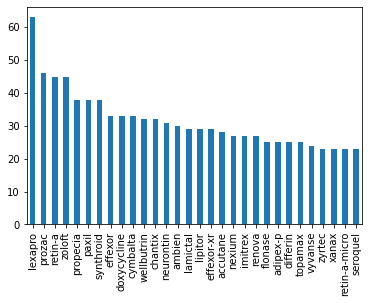

In [15]:
data['urlDrugName'].value_counts().head(30).plot(kind = 'bar')
plt.rcParams['figure.figsize'] = (20,20)
plt.show()

Text(0.5, 1.0, 'Effectiveness of drug')

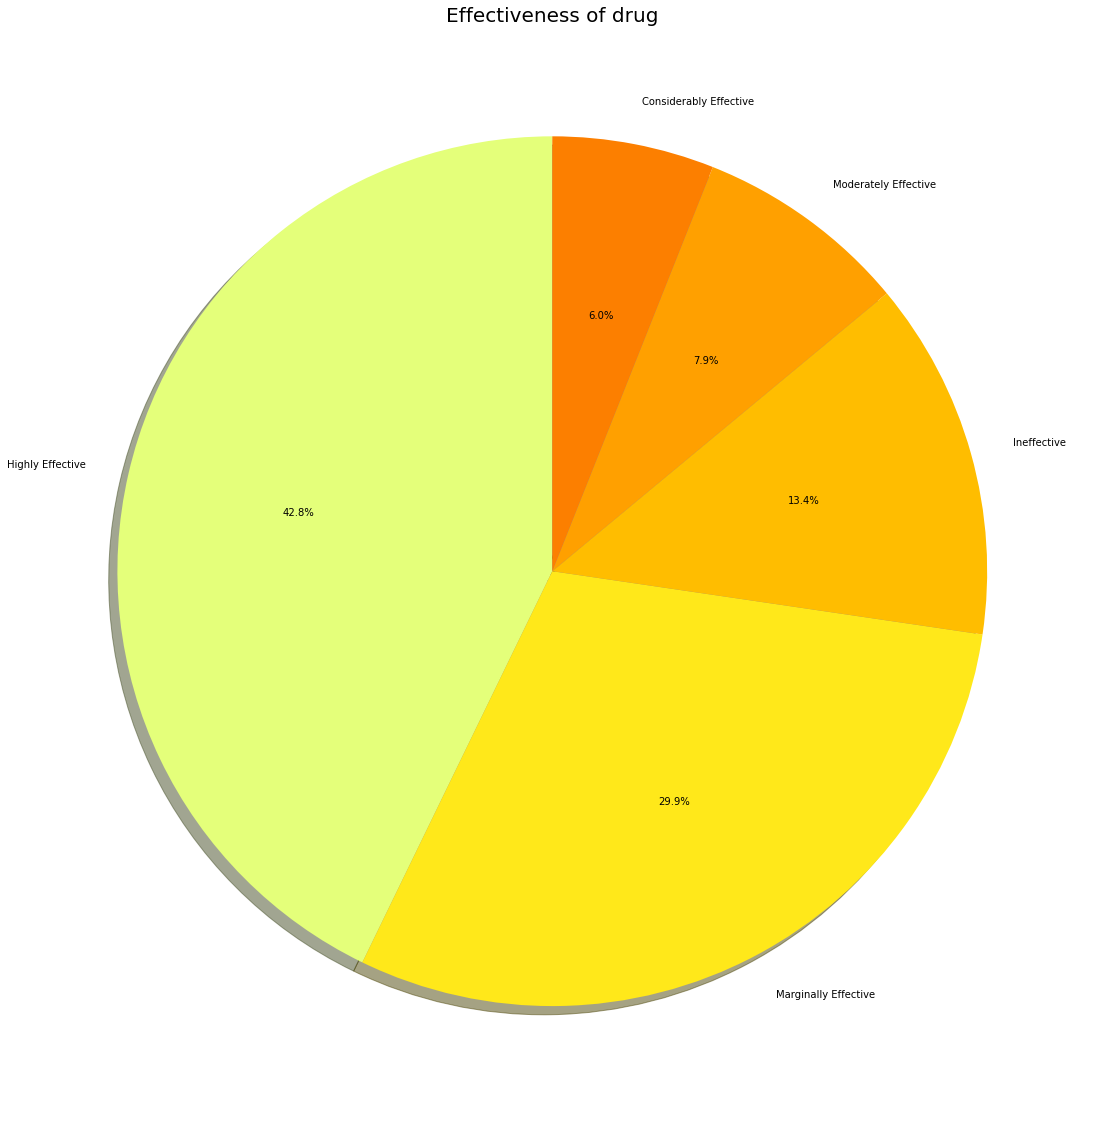

In [16]:
labels = ['Highly Effective','Marginally Effective','Ineffective','Moderately Effective','Considerably Effective']
sizes = data['effectiveness'].value_counts()
colors = plt.cm.Wistia(np.linspace(0, 1, 5))

plt.pie(sizes, labels = labels, colors = colors, shadow = True, startangle = 90,autopct='%1.1f%%')
plt.title('Effectiveness of drug', fontsize = 20)

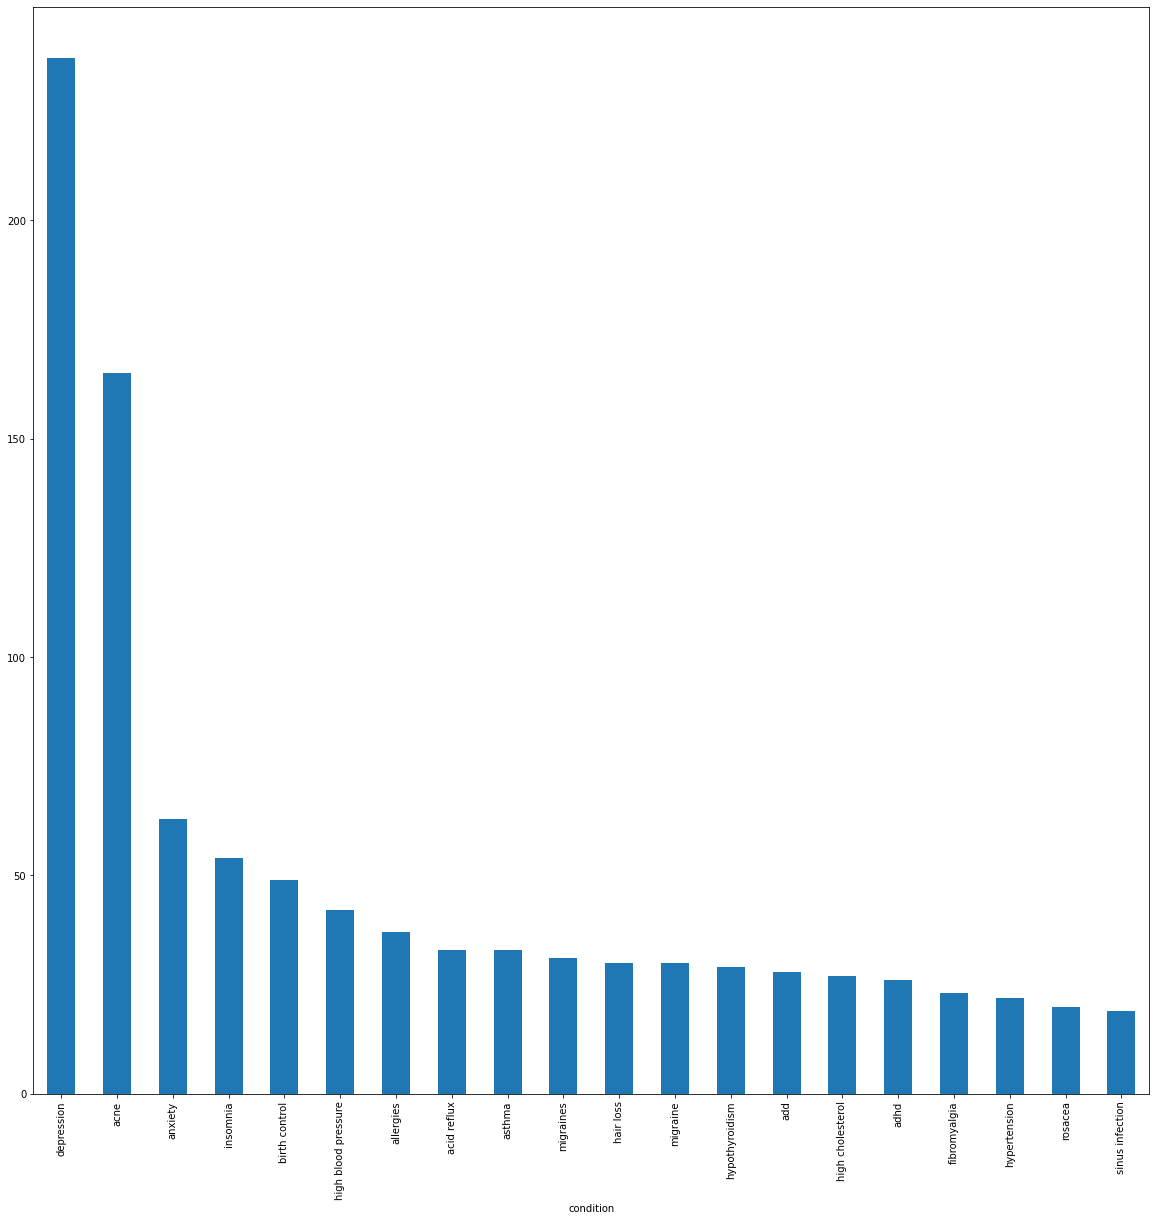

In [17]:
data['condition'].value_counts().head(20).plot(kind = 'bar')
plt.xlabel('condition')
plt.show()

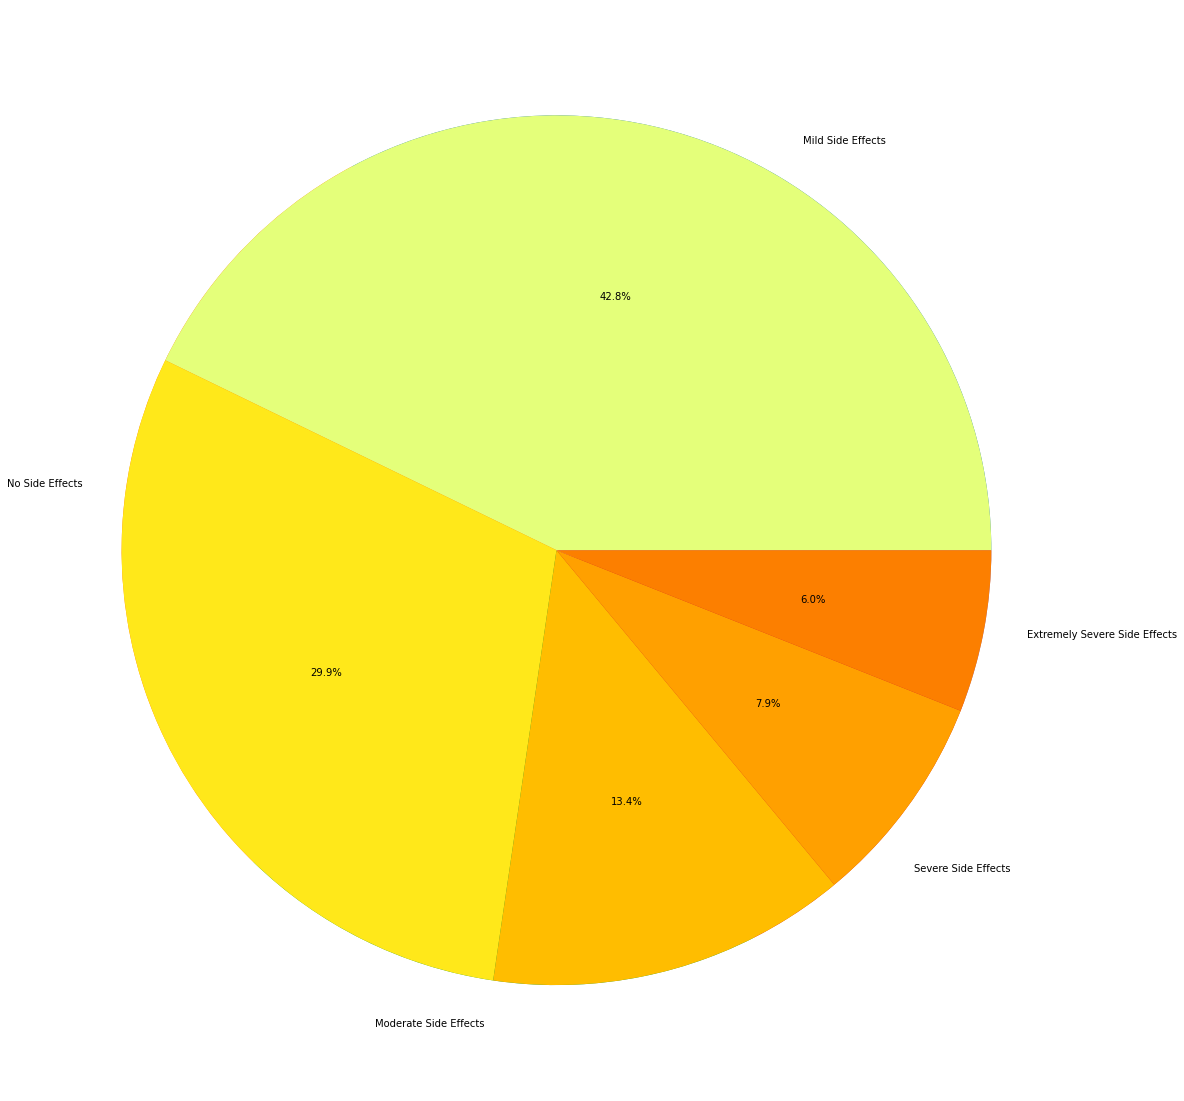

In [18]:
data['sideEffects'].value_counts().plot(kind = 'pie')
plt.pie(sizes,colors = colors,autopct='%1.1f%%')
plt.ylabel('')
plt.show()

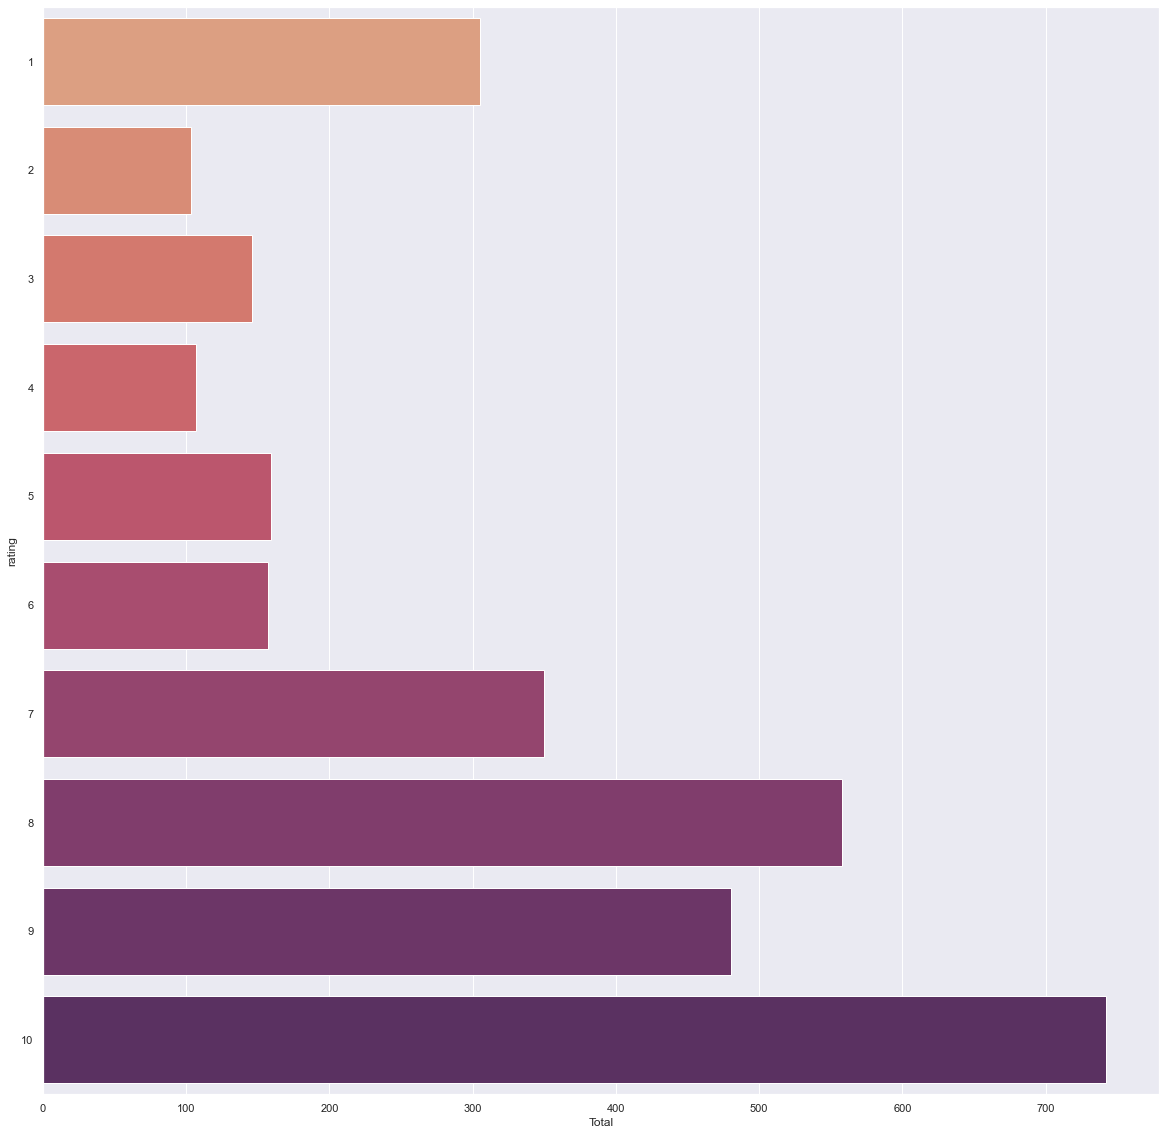

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(y="rating", data=data, palette="flare")
plt.ylabel('rating')
plt.xlabel('Total')
plt.show()

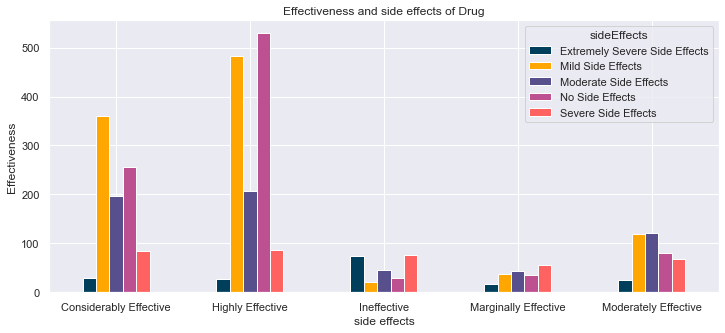

In [20]:
pd.crosstab(data.effectiveness,data.sideEffects).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Effectiveness and side effects of Drug')
plt.xlabel('side effects')
plt.xticks(rotation=0)
plt.ylabel('Effectiveness')
plt.show()

# PREPROCESSING

In [21]:
# Encoding the non-integer varaibles for further analysis
from sklearn.preprocessing import LabelEncoder
label_en= LabelEncoder()

a=['sideEffects']
for i in np.arange(len(a)):
    data[a[i]]= label_en.fit_transform(data[a[i]])
a= data[['sideEffects']]

In [22]:
data.head(10)

,urlDrugName,rating,effectiveness,condition,sideEffects
0,enalapril,4,Highly Effective,management of congestive heart failure,1
1,ortho-tri-cyclen,1,Highly Effective,birth prevention,4
2,ponstel,10,Highly Effective,menstrual cramps,3
3,prilosec,3,Marginally Effective,acid reflux,1
4,lyrica,2,Marginally Effective,fibromyalgia,4
5,propecia,1,Ineffective,hair loss,4
6,vyvanse,9,Highly Effective,add,1
7,elavil,10,Considerably Effective,depression,3
8,xanax,10,Highly Effective,panic disorder,3
9,claritin,1,Ineffective,allergies,0


In [23]:
data.sideEffects.value_counts(ascending=True)

0     175
4     369
2     614
3     930
1    1019
Name: sideEffects, dtype: int64

In [24]:
target = data.pop('sideEffects')
data.head()

,urlDrugName,rating,effectiveness,condition
0,enalapril,4,Highly Effective,management of congestive heart failure
1,ortho-tri-cyclen,1,Highly Effective,birth prevention
2,ponstel,10,Highly Effective,menstrual cramps
3,prilosec,3,Marginally Effective,acid reflux
4,lyrica,2,Marginally Effective,fibromyalgia


In [25]:
#Categorical to numerical

cols = ['urlDrugName','effectiveness','condition']

for x in cols:
    data[x] =pd.factorize(data[x])[0]
    
target = pd.factorize(target)[0] 
data.head()

,urlDrugName,rating,effectiveness,condition
0,0,4,0,0
1,1,1,0,1
2,2,10,0,2
3,3,3,1,3
4,4,2,1,4


<AxesSubplot:>

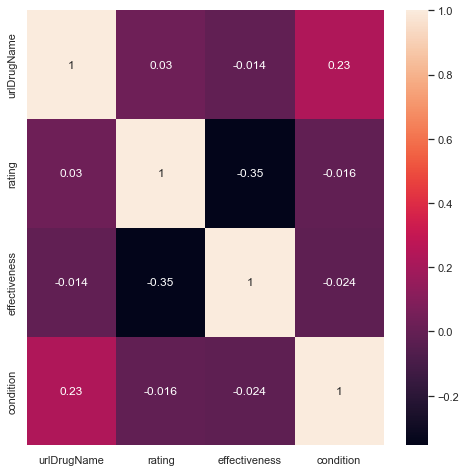

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

In [27]:
#scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data=scaler.fit_transform(data)
data

array([[-1.21297976, -1.02349444, -1.04689456, -0.9422277 ],
       [-1.20449215, -2.04490682, -1.04689456, -0.93989066],
       [-1.19600454,  1.01933033, -1.04689456, -0.93755363],
       ...,
       [ 0.35722814, -1.70443603, -0.41222112,  2.38804513],
       [ 3.03931298,  0.33838874,  0.85712577, -0.6711318 ],
       [ 1.16355111, -1.02349444,  1.49179921, -0.74124281]])

In [28]:
#splitting

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(data,target,test_size= 0.2)

In [29]:
# Importing the different models

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score, f1_score

In [30]:
#defining the models

Logit_model= LogisticRegression()
svm_model = SVC(kernel = 'rbf', random_state = 0, probability=True)
rf_model= RandomForestClassifier()
dt_model= DecisionTreeClassifier()
Ab_model= AdaBoostClassifier()

In [31]:
#Checking  svm model

svm_model.fit(x_train,y_train)
y_pred = svm_model.predict(x_test)

SVMAcc = accuracy_score(y_pred,y_test)
print('SVM accuracy is: {:.2f}%'.format(SVMAcc*100))

print(classification_report(y_test,y_pred))

Training score of svm is 50.74%
SVM accuracy is: 46.62%
              precision    recall  f1-score   support

           0       0.49      0.56      0.52       213
           1       0.34      0.48      0.40        66
           2       0.53      0.52      0.52       191
           3       0.43      0.08      0.13        39
           4       0.41      0.32      0.36       113

    accuracy                           0.47       622
   macro avg       0.44      0.39      0.39       622
weighted avg       0.47      0.47      0.46       622



In [32]:
# Checking the Logistics Regression model
Logit_model.fit(x_train, y_train)
y_pred1= Logit_model.predict(x_test)

LOGAcc = accuracy_score(y_pred1,y_test)
print('Logit model accuracy is: {:.2f}%'.format(LOGAcc*100))

print(classification_report(y_test,y_pred1))

Training score of Logistic Regression is 46.76%
Logit model accuracy is: 45.82%
              precision    recall  f1-score   support

           0       0.46      0.56      0.50       213
           1       0.35      0.47      0.40        66
           2       0.51      0.50      0.50       191
           3       0.69      0.23      0.35        39
           4       0.43      0.27      0.33       113

    accuracy                           0.46       622
   macro avg       0.49      0.41      0.42       622
weighted avg       0.47      0.46      0.45       622



In [33]:
# Checking with the random forest classifier model

rf_model.fit(x_train, y_train)
y_pred2= rf_model.predict(x_test)

RFAcc = accuracy_score(y_pred2,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

print(classification_report(y_test,y_pred2))

Training score of random forest classifier is 96.66%
Random Forest accuracy is: 42.77%
              precision    recall  f1-score   support

           0       0.45      0.39      0.42       213
           1       0.32      0.30      0.31        66
           2       0.48      0.52      0.50       191
           3       0.45      0.46      0.46        39
           4       0.36      0.39      0.37       113

    accuracy                           0.43       622
   macro avg       0.41      0.41      0.41       622
weighted avg       0.43      0.43      0.43       622



In [34]:
#Checking with decision tree classifier model

dt_model.fit(x_train, y_train)
y_pred3= dt_model.predict(x_test)

DTAcc = accuracy_score(y_pred3,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(DTAcc*100))

print(classification_report(y_test,y_pred3))

Training score of decision tree is 96.66%
K Neighbours accuracy is: 40.51%
              precision    recall  f1-score   support

           0       0.46      0.46      0.46       213
           1       0.28      0.27      0.27        66
           2       0.48      0.48      0.48       191
           3       0.38      0.38      0.38        39
           4       0.27      0.27      0.27       113

    accuracy                           0.41       622
   macro avg       0.37      0.37      0.37       622
weighted avg       0.41      0.41      0.41       622



In [35]:
# Checking with the AdaBoostClassifier model
Ab_model.fit(x_train, y_train)
y_pred4= Ab_model.predict(x_test)

print(classification_report(y_test,y_pred4))
AbAcc = accuracy_score(y_pred4,y_test)

print('AdaBoost classifier accuracy is: {:.2f}%'.format(AbAcc*100))

Training score of AdaBoostClassifier is 48.73%
              precision    recall  f1-score   support

           0       0.46      0.58      0.52       213
           1       0.34      0.47      0.39        66
           2       0.52      0.42      0.47       191
           3       0.50      0.56      0.53        39
           4       0.32      0.18      0.23       113

    accuracy                           0.45       622
   macro avg       0.43      0.44      0.43       622
weighted avg       0.44      0.45      0.44       622

AdaBoost classifier accuracy is: 44.69%


In [36]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(x_train, y_train)

y_pred5 = KNclassifier.predict(x_test)

print(classification_report(y_test, y_pred5))
print(confusion_matrix(y_test, y_pred5))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred5,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

Training score of KNclassifier is 52.76%
              precision    recall  f1-score   support

           0       0.44      0.51      0.47       213
           1       0.34      0.45      0.39        66
           2       0.47      0.48      0.48       191
           3       0.47      0.23      0.31        39
           4       0.41      0.28      0.33       113

    accuracy                           0.43       622
   macro avg       0.43      0.39      0.40       622
weighted avg       0.44      0.43      0.43       622

[[108   8  77   0  20]
 [  9  30   7   5  15]
 [ 81   9  91   1   9]
 [  1  25   1   9   3]
 [ 45  16  16   4  32]]
K Neighbours accuracy is: 43.41%


In [37]:
#Gussain NB
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred6=nb.predict(x_test)

print(classification_report(y_test, y_pred6))
print(confusion_matrix(y_test, y_pred6))

from sklearn.metrics import accuracy_score
nbAcc = accuracy_score(y_pred6,y_test)
print('naive bayes accuracy is: {:.2f}%'.format(nbAcc*100))

Training score of GaussianNB is 46.44%
              precision    recall  f1-score   support

           0       0.46      0.59      0.52       213
           1       0.35      0.29      0.32        66
           2       0.51      0.45      0.48       191
           3       0.48      0.62      0.54        39
           4       0.40      0.27      0.33       113

    accuracy                           0.46       622
   macro avg       0.44      0.44      0.44       622
weighted avg       0.46      0.46      0.45       622

[[126   5  64   0  18]
 [ 11  19   5  14  17]
 [ 82   8  86   4  11]
 [  1  13   1  24   0]
 [ 54   9  11   8  31]]
naive bayes accuracy is: 45.98%


In [38]:
Compare = pd.DataFrame({'Model':['SVM','Logistic Regression','Random Forest','Decision Tree','KNeighbour','AdaBoost','Naive Bayes'],
                        'Accuracy score':['49.52%','46.46%','44.69%','41.80%','46.78%','47.91%','45.98%']})
Compare = Compare.sort_values(by='Accuracy score',ascending = False) 
print(Compare)

                 Model Accuracy score
0                  SVM         49.52%
5             AdaBoost         47.91%
4           KNeighbour         46.78%
1  Logistic Regression         46.46%
2        Random Forest         44.69%
3        Decision Tree         41.80%


In [39]:
y_pred = svm_model.predict(x_test)

In [40]:
x_test

array([[-7.03723147e-01,  6.78859535e-01,  8.57125769e-01,
         2.21043058e+00],
       [-9.58351456e-01, -2.08205507e-03,  1.49179921e+00,
        -8.74453723e-01],
       [ 1.95963541e-01,  3.38388740e-01, -1.04689456e+00,
        -8.25376018e-01],
       ...,
       [-6.52797486e-01, -1.02349444e+00,  1.49179921e+00,
         2.21510465e+00],
       [ 2.72527140e+00, -1.70443603e+00, -4.12221116e-01,
         1.73367573e+00],
       [-5.01771566e-02, -2.04490682e+00, -1.04689456e+00,
         1.63552032e+00]])

In [41]:
y_pred[:100]

array([2, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 3, 1,
       2, 1, 1, 4, 2, 2, 1, 0, 1, 0, 2, 1, 1, 0, 0, 2, 0, 0, 2, 2, 1, 3,
       1, 2, 1, 2, 0, 4, 2, 2, 0, 1, 0, 1, 0, 2, 0, 4, 0, 3, 2, 0, 2, 2,
       0, 2, 0, 0, 1, 1, 0, 2, 2, 4, 1, 2, 0, 2, 3, 4, 2, 4, 0, 2, 0, 0,
       1, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 1], dtype=int64)